### Exercise 2
#### Argonne National Laboratory

In [1]:
#Reading in a NEXRAD file and plotting a PPI.
#Import modules
import os
import pyart
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cartopy.crs as ccrs
from cartopy import config
%matplotlib inline
print(pyart.__version__)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119 
1.8.0.dev+3b5b973


In [2]:
#Testing if pyart is running correctly.
if pyart.__version__ == "1.6.0":
    if hasattr(pyart.graph, 'RadarMapDisplay'):
        print ("Ready to go")
    else:
        print ("ISSUES\n\nMissing\Broken Basemap\n")
        pyart._debug_info()
else:
    print ("ISSUES\n\nWrong Py-ART version\n")
    pyart._debug_info()

ISSUES

Wrong Py-ART version

Py-ART version: 1.8.0.dev+3b5b973

---- Dependencies ----
Python version: 3.5.3
NumPy version: 1.11.3
SciPy version: 0.18.1
matplotlib version: 2.0.0
netCDF4 version: 1.2.7

---- Optional dependencies ----
TRMM RSL version: MISSING
CyLP: MISSING
PyGLPK version: MISSING
CVXOPT version: MISSING
basemap version: 1.0.8
nose version: 1.3.7


In [3]:
#Importing datafile
filename = '/home/zsherman/training_exercises/data/KLOT20130417_235520_V06.gz'
radar = pyart.io.read(filename)

In [ ]:
#Plot of reflectivity with Argonne and University of Chicago marked on the plot.
display = pyart.graph.RadarMapDisplay(radar)
f = plt.figure(figsize = [10, 8])
display.plot_ppi_map('reflectivity', max_lat = 44, min_lat=38.5,
                     min_lon = -93, max_lon = -84,
                     vmin = -8, vmax = 64, lat_lines = np.arange(40,45,1),
                     lon_lines = np.arange(-92, -79, 1),
                     resolution = 'h')

display.basemap.drawcounties()
display.basemap.bluemarble()
display.basemap.drawrivers()

display.plot_point(-87.5987, 41.7886,
                   symbol='ro',
                   label_text="University of Chicago",
                   label_offset=(None, None))

display.plot_point(-87.9819, 41.7137,
                   symbol='ro',
                   label_text="Argonne",
                   label_offset=(None, None))

In [12]:
def empty_radar_beam_block_ppi(ngates, rays_per_sweep, nsweeps,
                            lon, lat, alt, range_start,
                            gate_space, elevations):
    """ Creates a radar object with no fields based on
    user inputed dimensions. The empty radar is to then
    be used to add PBB, CBB and the flags for both. """
    radar = pyart.testing.make_empty_ppi_radar(
        ngates, rays_per_sweep, nsweeps)
    radar.longitude['data'] = np.array([lon])
    radar.latitude['data'] = np.array([lat])
    radar.altitude['data'] = np.array([alt])
    radar.azimuth['data'] = np.linspace(0, 360, rays_per_sweep)
    radar.range['data'] = np.linspace(
        range_start, (ngates - 1)*gate_space + range_start, ngates)
    radar.fixed_angle['data'] = elevations
    radar.elevation['data'] = np.array([elevations] * rays_per_sweep)
    radar.metadata['instrument_name'] = 'beam_block_radar_object'
    return radar

In [59]:
elevations = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 10.0, 11.0, 15.0,
                          20.0, 30.0, 40.0])
radar = empty_radar_beam_block_ppi(800, 990, 1, 73.85,
                                18.42, 10.0, 0, 100,
                                elevations=2.0)

In [62]:
pbb_flag_dict = {}
pbb_flag_dict['units'] = 'unitless'
pbb_flag_dict['data'] = np.zeros((990, 800), dtype='float32')
pbb_flag_dict['standard_name'] = 'reflectivity'
pbb_flag_dict['long_name'] = 'Partial Beam Block Flag'
radar.add_field('reflectivity',
                pbb_flag_dict, replace_existing=True)

/home/zsherman/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3435: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/zsherman/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3444: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/zsherman/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/zsherman/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/zsherman/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3310: Matplo

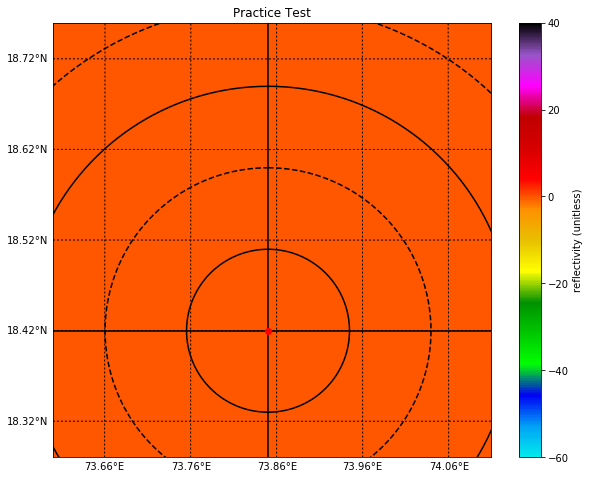

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pyart

# read in the file, create a RadarMapDisplay object
fig = plt.figure(figsize=[10, 8])
display = pyart.graph.RadarMapDisplay(radar)

display.plot_ppi_map(
    'reflectivity', vmin=-60, vmax=40,
    min_lon=72.2, max_lon=76.0, min_lat=17.16, max_lat=19.48,
    lon_lines=np.arange(72.6, 75.6, .4), projection='lcc',
    lat_lines=np.arange(17.20, 19.44, .4), resolution='h',
    lat_0=radar.latitude['data'][0],
    lon_0=radar.longitude['data'][0],
    title='Practice Test')

# plot range rings at 10, 20, 30 and 40km
display.plot_range_ring(10., line_style='k-')
display.plot_range_ring(20., line_style='k--')
display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(40., line_style='k--')

# plots cross hairs
display.plot_line_xy(np.array([-40000.0, 40000.0]), np.array([0.0, 0.0]),
line_style='k-')
display.plot_line_xy(np.array([0.0, 0.0]), np.array([-40000.0, 40000.0]),
line_style='k-')

# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0],
                   radar.latitude['data'][0])

display.basemap.drawcounties()
#display.basemap.drawrivers()
display.basemap.shadedrelief()
plt.savefig('practice_with_shaded_relief.png')
plt.show()

In [ ]:
radar.range

In [5]:
#Background information on NEXRAD and WSR-88D.
print("In 1988, the NEXRAD Agencies established the WSR-88D (Weather Surveillance Radar - 1988 Doppler) Radar Operations Center (ROC) in Norman, Oklahoma.")

In 1988, the NEXRAD Agencies established the WSR-88D (Weather Surveillance Radar - 1988 Doppler) Radar Operations Center (ROC) in Norman, Oklahoma.


In [6]:
print("The ROC provides centralized meteorological, software, maintenance, and engineering support for all WSR-88D systems.")
print("The ROC also operates WSR-88D test systems for the development of hardware and software upgrades to enhance maintenance, operation, and provide new functionality")

The ROC provides centralized meteorological, software, maintenance, and engineering support for all WSR-88D systems.
The ROC also operates WSR-88D test systems for the development of hardware and software upgrades to enhance maintenance, operation, and provide new functionality


In [7]:
#Checking radar fields
radar.fields.keys()

dict_keys(['cross_correlation_ratio', 'differential_phase', 'spectrum_width', 'reflectivity', 'velocity', 'differential_reflectivity'])

In [6]:
#Obtaining time and date when data was obtained.
radar.fields['velocity']['data'].shape

(8280, 1832)

In [8]:
radar.nrays

8280

In [15]:
radar.gate_x['data'].shape

(8280, 1832)

In [16]:
radar.ngates

1832

In [17]:
radar.nrays

8280

In [21]:
radar.elevation['data'].shape

(8280,)

In [28]:
radar.radar_calibration

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [25]:
#Obtaining datetime using datetime and pytz modules.
date_str = ("2013-04-17 23:55:20")
datetime_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
datetime_obj_utc = datetime_obj.replace(tzinfo = timezone('UTC'))
print (datetime_obj_utc.strftime("%Y-%m-%d %H:%M:%S %Z%z"))



NameError: name 'datetime' is not defined

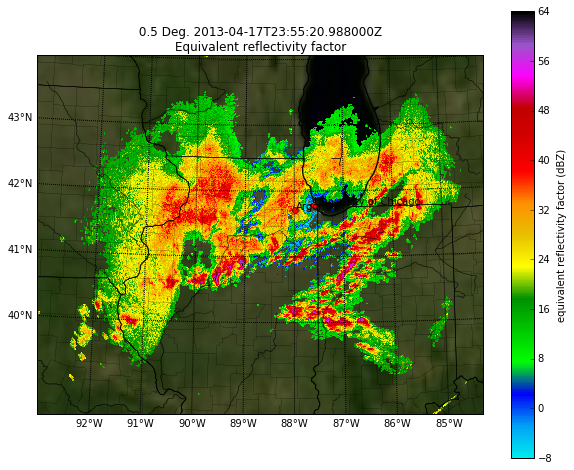

In [75]:
#Plot of reflectivity with Argonne and University of Chicago marked on the plot.
display = pyart.graph.RadarMapDisplay(radar)
f = plt.figure(figsize = [10, 8])
display.plot_ppi_map('reflectivity', max_lat = 44, min_lat=38.5,
                     min_lon = -93, max_lon = -84,
                     vmin = -8, vmax = 64, lat_lines = np.arange(40,45,1),
                     lon_lines = np.arange(-92, -79, 1),
                     resolution = 'h')

display.basemap.drawcounties()
display.basemap.bluemarble()
display.basemap.drawrivers()

display.plot_point(-87.5987, 41.7886,
                   symbol='ro',
                   label_text="University of Chicago",
                   label_offset=(None, None))

display.plot_point(-87.9819, 41.7137,
                   symbol='ro',
                   label_text="Argonne",
                   label_offset=(None, None))

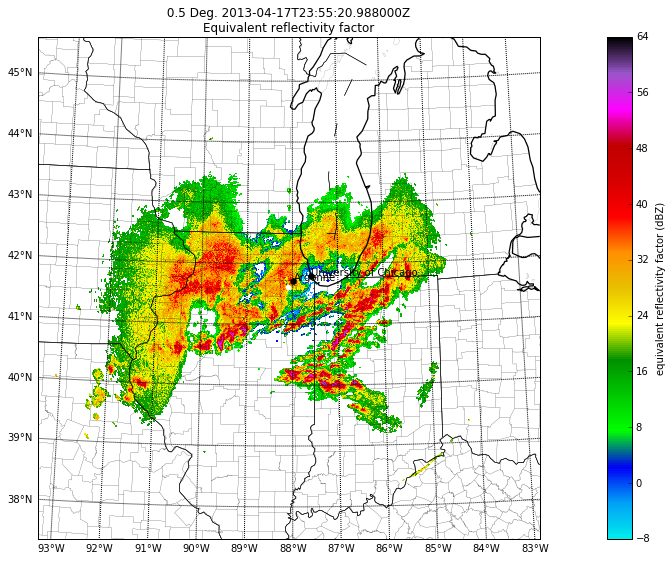

In [76]:
#Plot of reflectivity with counties and locations marked using nexrad site instead of input coordinates.
nexrad_site = 'klot'
f = plt.figure(figsize = [24,9])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', vmin=-8, vmax=64,
                     cmap='pyart_NWSRef', resolution='i',
                     embelish=True)

display.basemap.drawcounties()
display.plot_point(-87.5987, 41.7886, symbol='ko',
                   label_text="University of Chicago",
                   label_offset=(None, None))
display.plot_point(-87.9819, 41.7137, symbol='ko',
                   label_text="Argonne", label_offset=(None, None))